In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Iris dataset
from sklearn.datasets import load_iris
iris_data = load_iris()
df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
df['species'] = iris_data.target
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

In [3]:
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


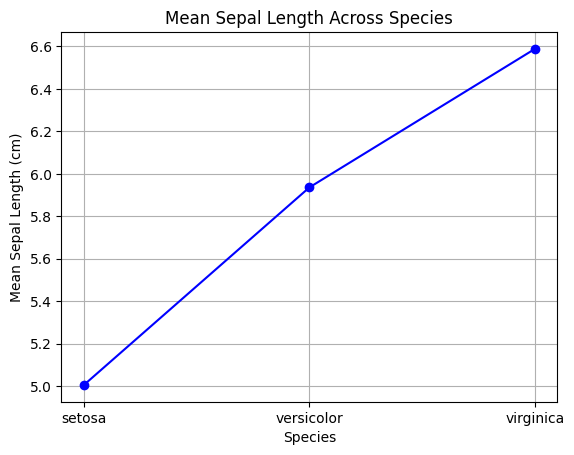

In [5]:
mean_sepal_length = df.groupby('species')['sepal length (cm)'].mean()
plt.plot(mean_sepal_length, marker='o', linestyle='-', color='b')
plt.title('Mean Sepal Length Across Species')
plt.xlabel('Species')
plt.ylabel('Mean Sepal Length (cm)')
plt.grid()
plt.show()


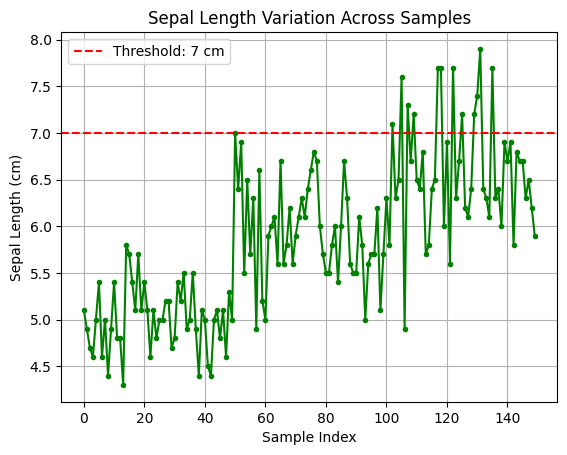

In [6]:
plt.plot(df['sepal length (cm)'], marker='.', linestyle='-', color='g')
plt.axhline(7, color='r', linestyle='--', label='Threshold: 7 cm')
plt.title('Sepal Length Variation Across Samples')
plt.xlabel('Sample Index')
plt.ylabel('Sepal Length (cm)')
plt.legend()
plt.grid()
plt.show()


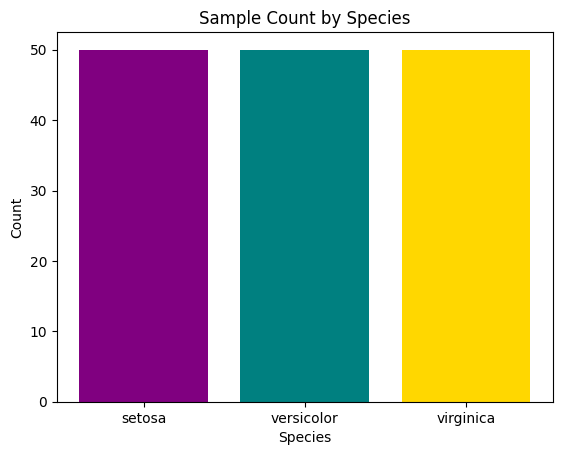

In [8]:
species_count = df['species'].value_counts()
plt.bar(species_count.index, species_count, color=['purple', 'teal', 'gold'])
plt.title('Sample Count by Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()


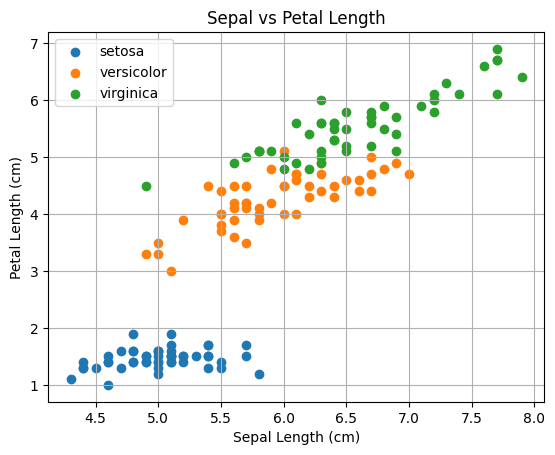

In [9]:
for species in df['species'].unique():
    species_data = df[df['species'] == species]
    plt.scatter(species_data['sepal length (cm)'], species_data['petal length (cm)'], label=species)
plt.title('Sepal vs Petal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.legend()
plt.grid()
plt.show()


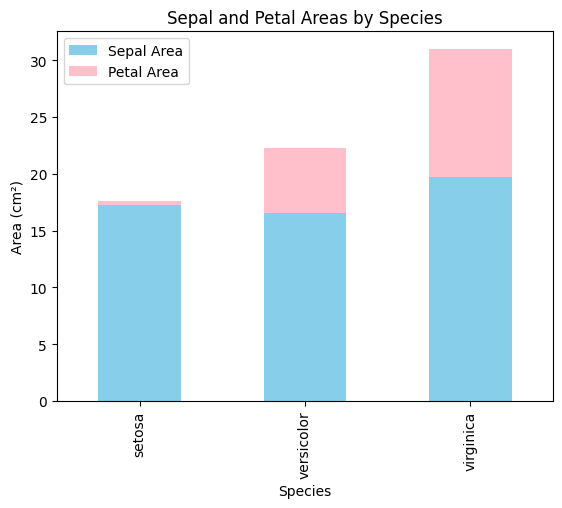

In [11]:
df['petal area'] = df['petal length (cm)'] * df['petal width (cm)']
df['sepal area'] = df['sepal length (cm)'] * df['sepal width (cm)']
mean_areas = df.groupby('species')[['sepal area', 'petal area']].mean()

mean_areas.plot(kind='bar', stacked=True, color=['skyblue', 'pink'])
plt.title('Sepal and Petal Areas by Species')
plt.xlabel('Species')
plt.ylabel('Area (cm²)')
plt.legend(['Sepal Area', 'Petal Area'])
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_2956\3712026837.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  versicolor_data['petal width contribution'] = (versicolor_data['petal width (cm)'] / total_petal_width) * 100


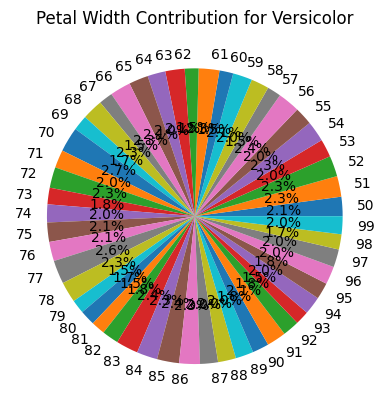

In [12]:
versicolor_data = df[df['species'] == 'versicolor']
total_petal_width = versicolor_data['petal width (cm)'].sum()
versicolor_data['petal width contribution'] = (versicolor_data['petal width (cm)'] / total_petal_width) * 100
plt.pie(versicolor_data['petal width contribution'], labels=versicolor_data.index, autopct='%1.1f%%')
plt.title('Petal Width Contribution for Versicolor')
plt.show()


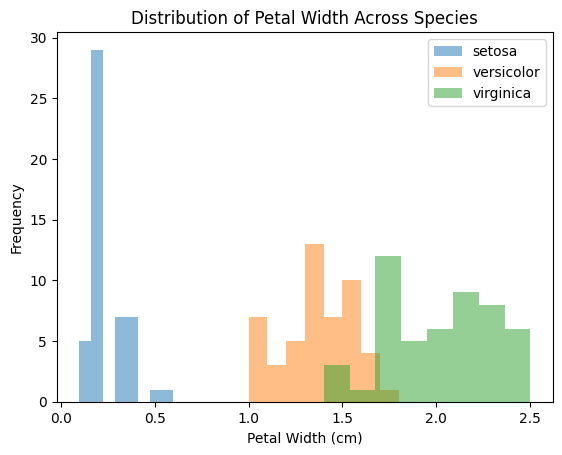

In [13]:
for species in df['species'].unique():
    species_data = df[df['species'] == species]
    plt.hist(species_data['petal width (cm)'], bins=8, alpha=0.5, label=species)
plt.title('Distribution of Petal Width Across Species')
plt.xlabel('Petal Width (cm)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


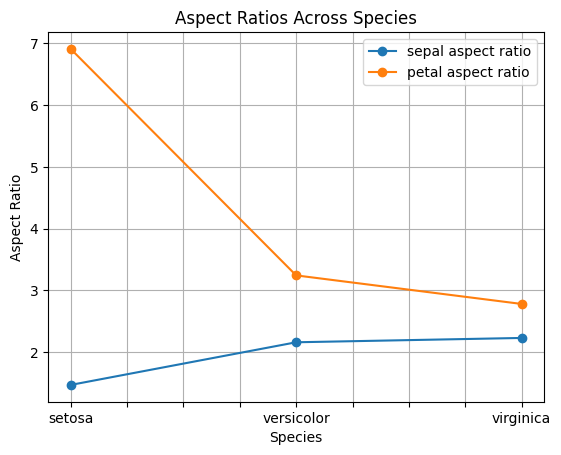

In [7]:
df['sepal aspect ratio'] = df['sepal length (cm)'] / df['sepal width (cm)']
df['petal aspect ratio'] = df['petal length (cm)'] / df['petal width (cm)']

mean_ratios = df.groupby('species')[['sepal aspect ratio', 'petal aspect ratio']].mean()
mean_ratios.plot(kind='line', marker='o')
plt.title('Aspect Ratios Across Species')
plt.xlabel('Species')
plt.ylabel('Aspect Ratio')
plt.grid()
plt.show()
